# High-level Plotting

matplotlib is a relatively *low-level* plotting package, relative to others. It makes very few assumptions about what constitutes good layout (by design), but has a lot of flexiblility to allow the user to completely customize the look of the output.

On the other hand, Pandas includes methods for DataFrame and Series objects that are relatively high-level, and that make reasonable assumptions about how the plot should look.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

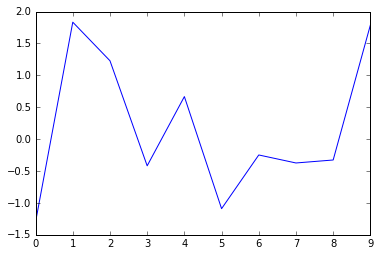

In [2]:
normals = pd.Series(np.random.normal(size=10))
normals.plot()

Notice that by default a line plot is drawn, and a light grid is included. All of this can be changed, however:

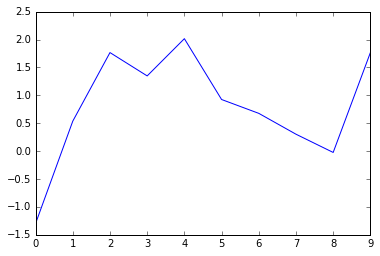

In [3]:
normals.cumsum().plot(grid=False)

Similarly, for a DataFrame:

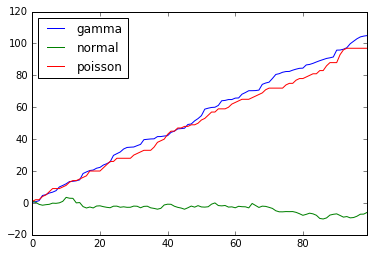

In [4]:
variables = pd.DataFrame({'normal': np.random.normal(size=100), 
                       'gamma': np.random.gamma(1, size=100), 
                       'poisson': np.random.poisson(size=100)})
variables.cumsum(0).plot()

As an illustration of the high-level nature of Pandas plots, we can split multiple series into subplots with a single argument for `plot`:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1123a2a58>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x112a08358>], dtype=object)

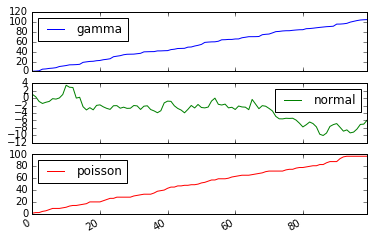

In [5]:
variables.cumsum(0).plot(subplots=True, grid=False)

Or, we may want to have some series displayed on the secondary y-axis, which can allow for greater detail and less empty space:

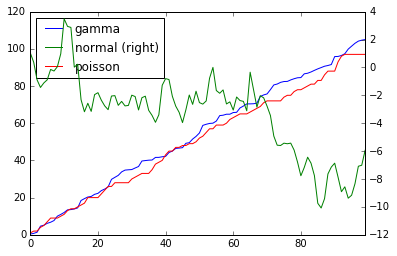

In [6]:
variables.cumsum(0).plot(secondary_y='normal', grid=False)

If we would like a little more control, we can use matplotlib's `subplots` function directly, and manually assign plots to its axes:

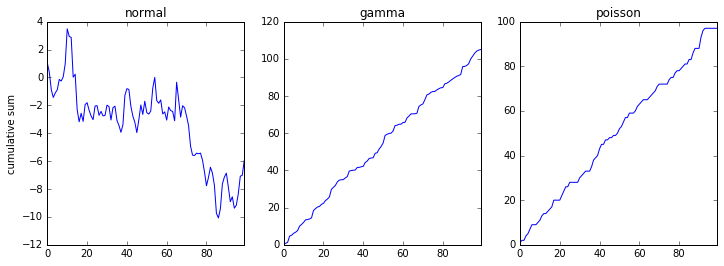

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i,var in enumerate(['normal','gamma','poisson']):
    variables[var].cumsum(0).plot(ax=axes[i], title=var)
axes[0].set_ylabel('cumulative sum')

## Bar plots

Bar plots are useful for displaying and comparing measurable quantities, such as counts or volumes. In Pandas, we just use the `plot` method with a `kind='bar'` argument.

For this series of examples, let's load up the Titanic dataset:

In [9]:
titanic = pd.read_excel("../data/titanic.xls", "titanic")
titanic.head()

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

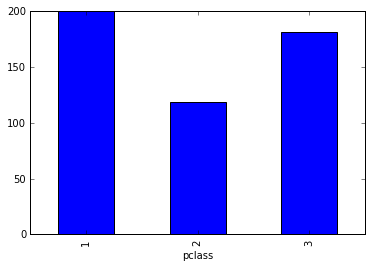

In [10]:
titanic.groupby('pclass').survived.sum().plot(kind='bar')

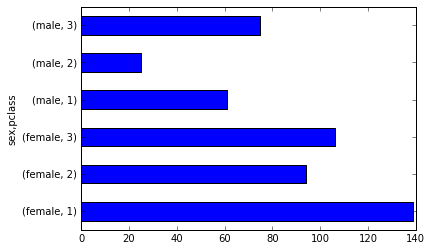

In [11]:
titanic.groupby(['sex','pclass']).survived.sum().plot(kind='barh')

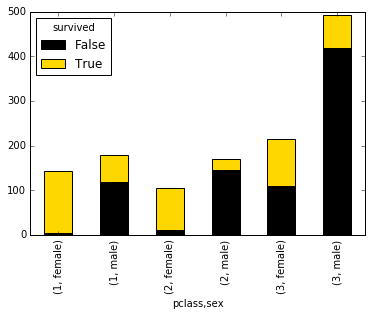

In [12]:
death_counts = pd.crosstab([titanic.pclass, titanic.sex], titanic.survived.astype(bool))
death_counts.plot(kind='bar', stacked=True, color=['black','gold'], grid=False)

Another way of comparing the groups is to look at the survival *rate*, by adjusting for the number of people in each group.

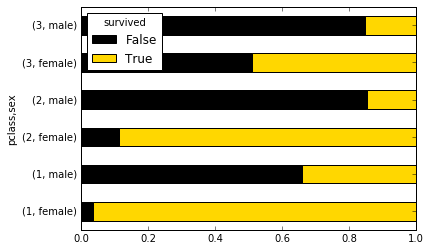

In [13]:
death_counts.div(death_counts.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, color=['black','gold'])

## Histograms

Frequenfly it is useful to look at the *distribution* of data before you analyze it. Histograms are a sort of bar graph that displays relative frequencies of data values; hence, the y-axis is always some measure of frequency. This can either be raw counts of values or scaled proportions.

For example, we might want to see how the fares were distributed aboard the titanic:

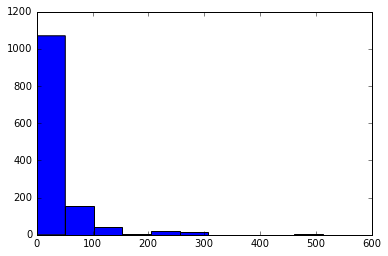

In [14]:
titanic.fare.hist(grid=False)

The `hist` method puts the continuous fare values into **bins**, trying to make a sensible décision about how many bins to use (or equivalently, how wide the bins are). We can override the default value (10):

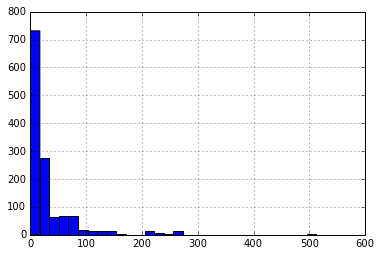

In [15]:
titanic.fare.hist(bins=30)

There are algorithms for determining an "optimal" number of bins, each of which varies somehow with the number of observations in the data series.

In [16]:
sturges = lambda n: int(np.log2(n) + 1)
square_root = lambda n: int(np.sqrt(n))
from scipy.stats import kurtosis
doanes = lambda data: int(1 + np.log(len(data)) + np.log(1 + kurtosis(data) * (len(data) / 6.) ** 0.5))

n = len(titanic)
sturges(n), square_root(n), doanes(titanic.fare.dropna())

(11, 36, 14)

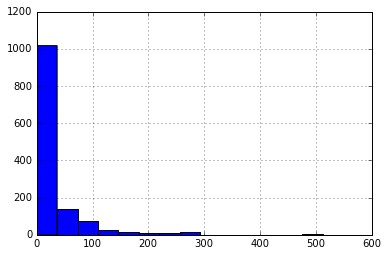

In [17]:
titanic.fare.hist(bins=doanes(titanic.fare.dropna()))

A **density plot** is similar to a histogram in that it describes the distribution of the underlying data, but rather than being a pure empirical representation, it is an *estimate* of the underlying "true" distribution. As a result, it is smoothed into a continuous line plot. We create them in Pandas using the `plot` method with `kind='kde'`, where `kde` stands for **kernel density estimate**.

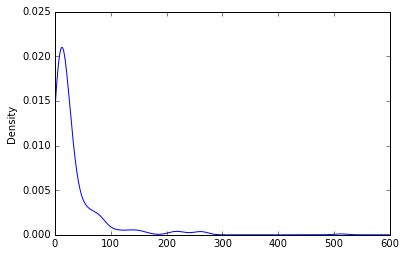

In [18]:
titanic.fare.dropna().plot(kind='kde', xlim=(0,600))

Often, histograms and density plots are shown together:

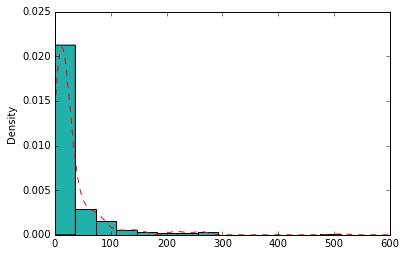

In [19]:
titanic.fare.hist(bins=doanes(titanic.fare.dropna()), normed=True, color='lightseagreen')
titanic.fare.dropna().plot(kind='kde', xlim=(0,600), style='r--')

Here, we had to normalize the histogram (`normed=True`), since the kernel density is normalized by definition (it is a probability distribution).

We will explore kernel density estimates more in the next section.

## Boxplots

A different way of visualizing the distribution of data is the boxplot, which is a display of common quantiles; these are typically the quartiles and the lower and upper 5 percent values.

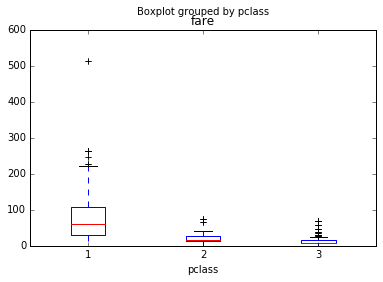

In [20]:
titanic.boxplot(column='fare', by='pclass', grid=False)

You can think of the box plot as viewing the distribution from above. The blue crosses are "outlier" points that occur outside the extreme quantiles.

One way to add additional information to a boxplot is to overlay the actual data; this is generally most suitable with small- or moderate-sized data series.

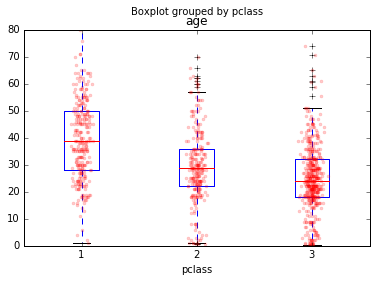

In [21]:
bp = titanic.boxplot(column='age', by='pclass', grid=False)
for i in [1,2,3]:
    y = titanic.age[titanic.pclass==i].dropna()
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y.values, 'r.', alpha=0.2)

When data are dense, a couple of tricks used above help the visualization:

1. reducing the alpha level to make the points partially transparent
2. adding random "jitter" along the x-axis to avoid overstriking

### Exercise

Using the Titanic data, create kernel density estimate plots of the age distributions of survivors and victims.

In [22]:
# Write your answer here

## Scatterplots

To look at how Pandas does scatterplots, let's look at a small dataset of wine chemistry.

In [25]:
wine.rename?

In [29]:
wine = pd.read_table("../data/wine.dat", sep='\s+')

attributes = ['Grape',
            'Alcohol',
            'Malic acid',
            'Ash',
            'Alcalinity of ash',
            'Magnesium',
            'Total phenols',
            'Flavanoids',
            'Nonflavanoid phenols',
            'Proanthocyanins',
            'Color intensity',
            'Hue',
            'OD280/OD315 of diluted wines',
            'Proline']

wine.columns = attributes

Scatterplots are useful for data exploration, where we seek to uncover relationships among variables. There are no scatterplot methods for Series or DataFrame objects; we must instead use the matplotlib function `scatter`.

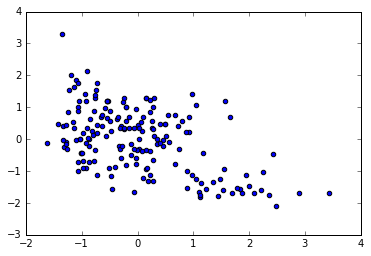

In [28]:
plt.scatter(wine['Color intensity'], wine['Hue'])

We can add additional information to scatterplots by assigning variables to either the size of the symbols or their colors.

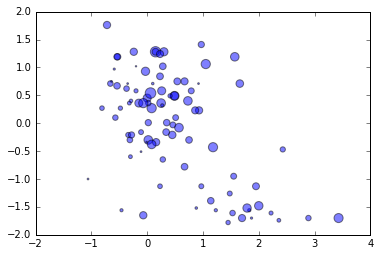

In [33]:
plt.scatter(wine['Color intensity'], wine['Hue'], s=wine.Alcohol*50, alpha=0.5)

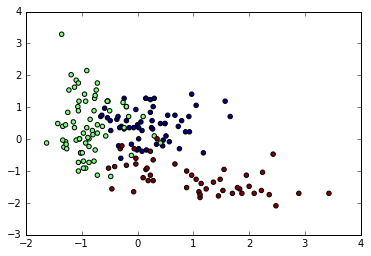

In [36]:
plt.scatter(wine['Color intensity'], wine['Hue'], c=wine.Grape)

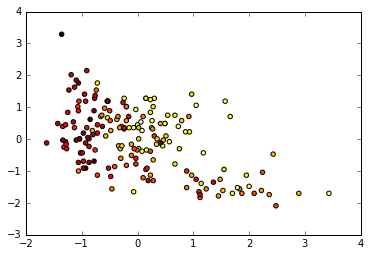

In [35]:
plt.scatter(wine['Color intensity'], wine['Hue'], c=wine.Alcohol, cmap='hot')

To view scatterplots of a large numbers of variables simultaneously, we can use the `scatter_matrix` function that was recently added to Pandas. It generates a matrix of pair-wise scatterplots, optiorally with histograms or kernel density estimates on the diagonal.

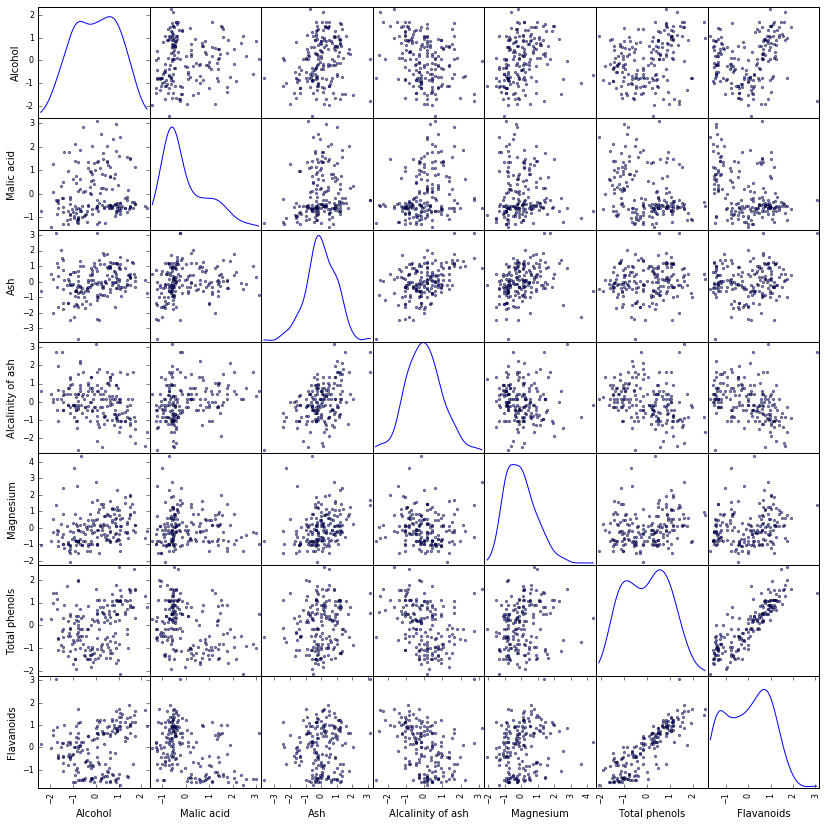

In [45]:
_ = pd.scatter_matrix(wine.loc[:, 'Alcohol':'Flavanoids'], figsize=(14,14), diagonal='kde')

# Seaborn

Seaborn is a modern data visualization tool for Python, created by Michael Waskom. An easy way to see how Seaborn can immediately improve your data visualization, is by setting the plot style using one of its sevefral built-in styles.

Here is a simple Matplotlib plot before Seaborn:

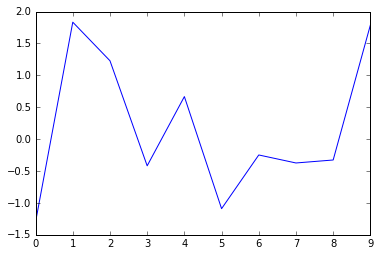

In [46]:
plt.plot(normals)

Seaborn is conventionally imported using the `sns` alias.

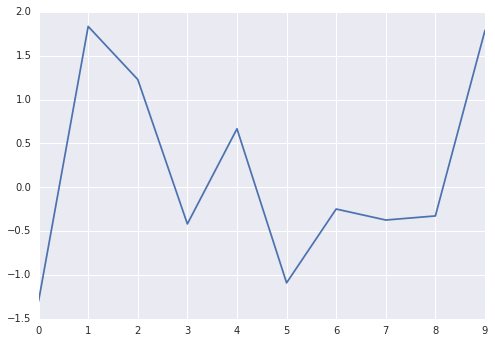

In [47]:
import seaborn as sns
sns.set()

plt.plot(normals)

Seaborn works hand-in-hand with pandas to create publication-quality visualizations quickly and easily from `DataFrame` and `Series` data.

For example, we can generate kernel density estimates of two sets of simulated data, via the `kdeplot` function.

In [48]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])
data.head()

          x         y
0 -3.902245  1.276567
1  4.043558  0.545513
2  0.762538 -0.176199
3  2.299544 -1.366216
4  0.815338  0.441764

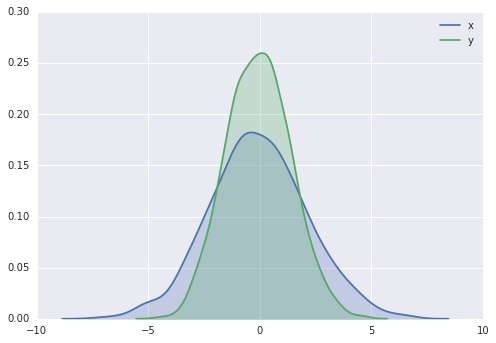

In [49]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

`distplot` combines a kernel density estimate and a histogram.

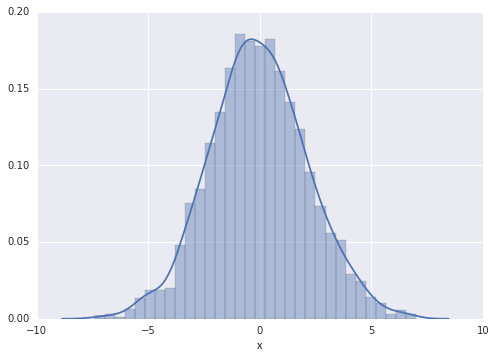

In [50]:
sns.distplot(data['x'])

If `kdeplot` is provided with two columns of data, it will automatically generate a contour plot of the joint KDE.

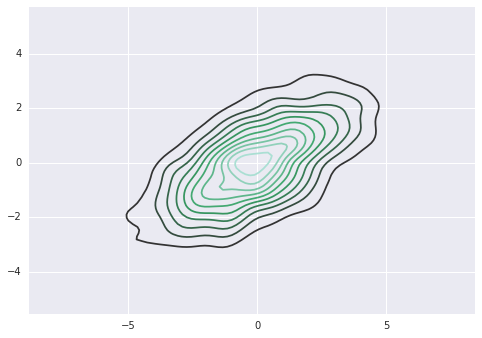

In [51]:
sns.kdeplot(data);

In [54]:
wine.head()

   Grape  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1     1.51       -0.56  0.23              -1.17       1.91   
1      1     0.25       -0.50 -0.83              -2.48       0.02   
2      1     0.20        0.02  1.11              -0.27       0.09   
3      1     1.69       -0.35  0.49              -0.81       0.93   
4      1     0.29        0.23  1.84               0.45       1.28   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           0.81        1.03                 -0.66             1.22   
1           0.57        0.73                 -0.82            -0.54   
2           0.81        1.21                 -0.50             2.13   
3           2.48        1.46                 -0.98             1.03   
4           0.81        0.66                  0.23             0.40   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             0.25  0.36                          1.84     1.01  
1            -0.29  0.40  

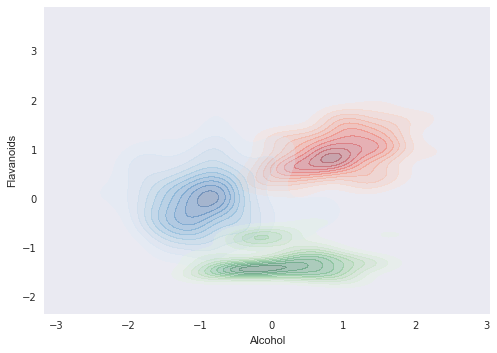

In [66]:
cmap = {1:'Reds', 2:'Blues', 3:'Greens'}

with sns.axes_style('dark'):
    for grape in cmap:
        alcohol, flavanoids = wine.loc[wine.Grape==grape, ['Alcohol', 'Flavanoids']].T.values

        sns.kdeplot(alcohol, flavanoids,
            cmap=cmap[grape], shade=True, shade_lowest=False, alpha=0.3)
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids');

Similarly, `jointplot` will generate a shaded joint KDE, along with the marginal KDEs of the two variables.

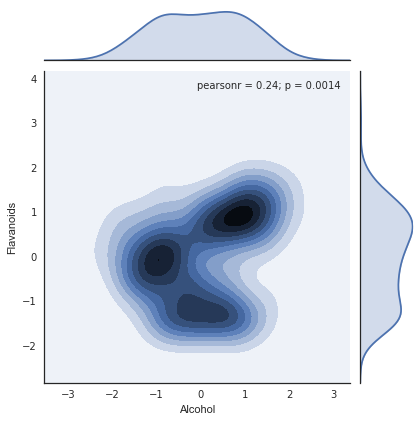

In [67]:
with sns.axes_style('white'):
    sns.jointplot("Alcohol", "Flavanoids", wine, kind='kde');

To explore correlations among several variables, the `pairplot` function generates pairwise plots, along with histograms along the diagonal, and a fair bit of customization.

In [68]:
titanic = titanic[titanic.age.notnull() & titanic.fare.notnull()]

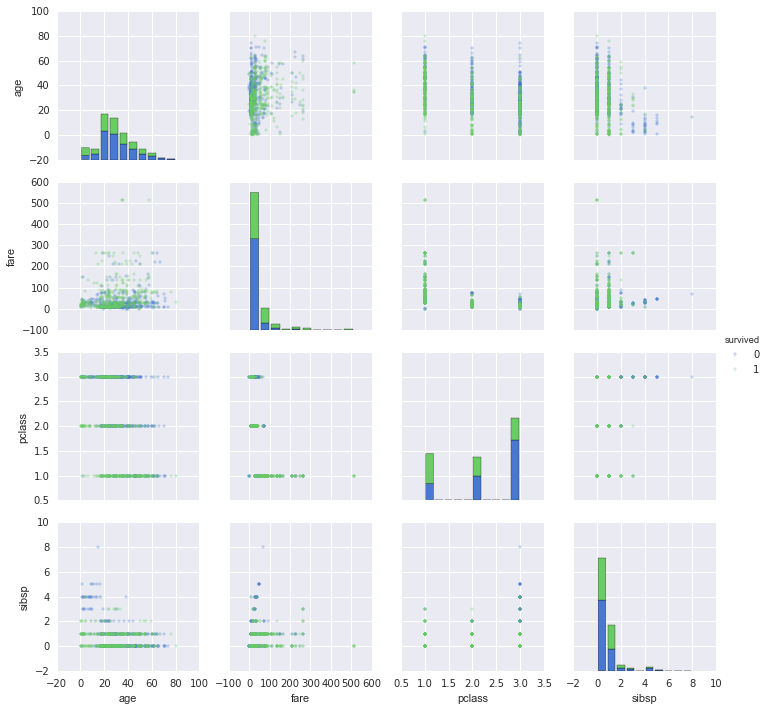

In [69]:
sns.pairplot(titanic, vars=['age', 'fare', 'pclass', 'sibsp'], hue='survived', palette="muted", markers='+')

Another way of exploring mutliple variables simulaneously is to generate trellis plots with `FacetGrid`.

Let's use the `titanic` dataset to create a trellis plot that represents 3 variables at a time. This consists of 2 steps:

1. Create a `FacetGrid` object that relates two variables in the dataset in a grid of pairwise comparisons.
2. Add the actual plot (`distplot`) that will be used to visualize each comparison.

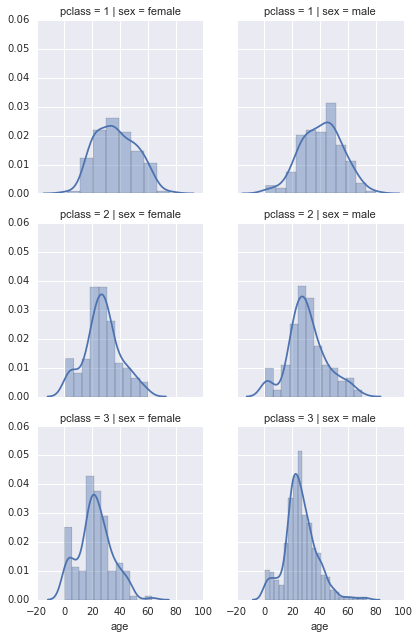

In [70]:
g = sns.FacetGrid(titanic, col="sex", row="pclass")
g.map(sns.distplot, 'age')

Using the cervical dystonia dataset, we can simultaneously examine the relationship between age and the primary outcome variable as a function of both the treatment received and the week of the treatment by creating a scatterplot of the data, and fitting a polynomial relationship between `age` and `twstrs`:

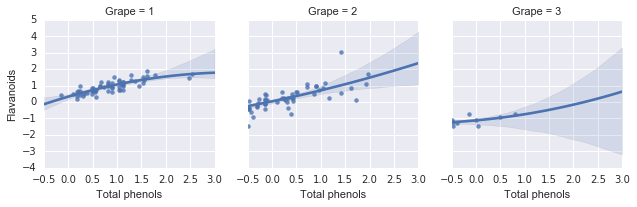

In [75]:
g = sns.FacetGrid(wine, col="Grape")
g.map(sns.regplot, 'Total phenols', 'Flavanoids', order=2)

## References

VanderPlas, J. [Data visualization with Seaborn](https://www.oreilly.com/learning/data-visualization-with-seaborn), O'Reilly.